![Quora-1.png](attachment:Quora-1.png)

<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

<h1>3. Exploratory Data Analysis </h1>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
!pip install Distance

     |████████████████████████████████| 184kB 2.8MB/s eta 0:00:01
  Created wheel for Distance: filename=Distance-0.1.3-cp36-none-any.whl size=16261 sha256=e052ca944ed97ec35dcd11031ee98df02d4e62296a8b6f480d508e5a41d72982
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built Distance


In [3]:
!wget --header="Host: doc-0k-7g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,es;q=0.8,bn;q=0.7" --header="Referer: https://drive.google.com/drive/u/0/folders/1OWZoiQDvAvgOa-IUnEQ-6QKSEp_pw1XO" --header="Cookie: AUTH_n1uo5dhd8n5l88opia0096tdep4gr8f3=01852114805349138987|1594671225000|h42ujeg08spa3ka4tcas4ft6m9fjp38g; NID=200=oakYG17qbOoKPqe0qO2LF9m3bG1EFgzvU3prR8uQ3NwreSw6kxF5LB9QC9PYJrUItONrCz7iEf6pXPqaPgKZTpTBdG8qTtzq-CK50ynGbLs2Rh0RjtfA2XLEdAnch68SLaFfXtuGf5GNqCGoT_Hc-v8xrotuXbnKxsSiyfhE16I" --header="Connection: keep-alive" "https://doc-0k-7g-docs.googleusercontent.com/docs/securesc/hlhgfjcp907ppu26tddhe7iskaih68dg/6dtr4roqjkakmp9534of6j9end2clvge/1594671225000/06629147635963609455/01852114805349138987/10QDGTSI5PEV9e7CTpfzsXRpUwRIsJA-J?e=download&authuser=0" -c -O 'train.csv'

--2020-07-13 20:16:11--  https://doc-0k-7g-docs.googleusercontent.com/docs/securesc/hlhgfjcp907ppu26tddhe7iskaih68dg/6dtr4roqjkakmp9534of6j9end2clvge/1594671225000/06629147635963609455/01852114805349138987/10QDGTSI5PEV9e7CTpfzsXRpUwRIsJA-J?e=download&authuser=0
Resolving doc-0k-7g-docs.googleusercontent.com (doc-0k-7g-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-0k-7g-docs.googleusercontent.com (doc-0k-7g-docs.googleusercontent.com)|108.177.97.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘train.csv’

train.csv               [   <=>              ]  60.46M  77.4MB/s    in 0.8s    

2020-07-13 20:16:13 (77.4 MB/s) - ‘train.csv’ saved [63399110]



<h2> 3.1 Reading data and basic stats </h2>

In [4]:
df = pd.read_csv("train.csv")

print("Number of data points:",df.shape[0])

Number of data points: 404290


In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - whether the two questions are duplicates of each other.

<h3> 3.2.1 Distribution of data points among output classes</h3>
- Number of duplicate(smilar) and non-duplicate(non similar) questions

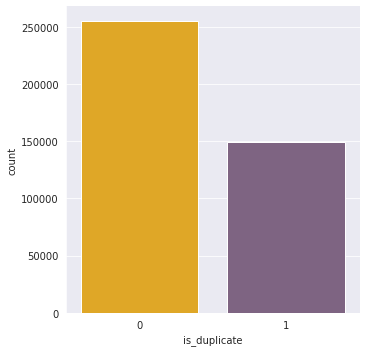

In [7]:
sns.set_style('darkgrid')
col = ["amber", "dusty purple"]
sns.catplot(x ='is_duplicate', kind = 'count', palette= sns.xkcd_palette(col), data = df)

In [8]:
print('--> Total number of question pairs for training:\n   {}'.format(len(df)))

--> Total number of question pairs for training:
   404290


In [9]:
print('--> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\n--> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

--> Question pairs are not Similar (is_duplicate = 0):
   63.08%

--> Question pairs are Similar (is_duplicate = 1):
   36.92%


<h3> 3.2.2 Number of unique questions </h3>

In [10]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



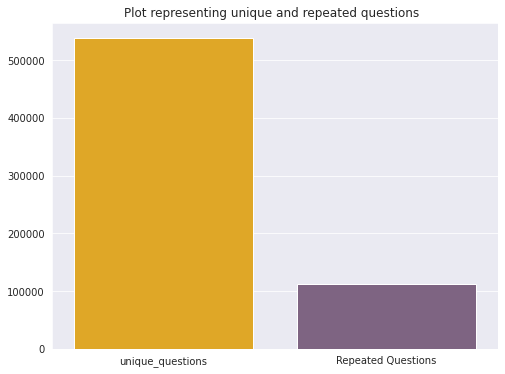

In [ ]:

x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize = (8, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x, y, palette= sns.xkcd_palette(col))
plt.show()

<h3>3.2.3 Checking for Duplicates </h3>

In [ ]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


<h3> 3.2.4 Number of occurrences of each question </h3>

Maximum number of times a single question is repeated: 157



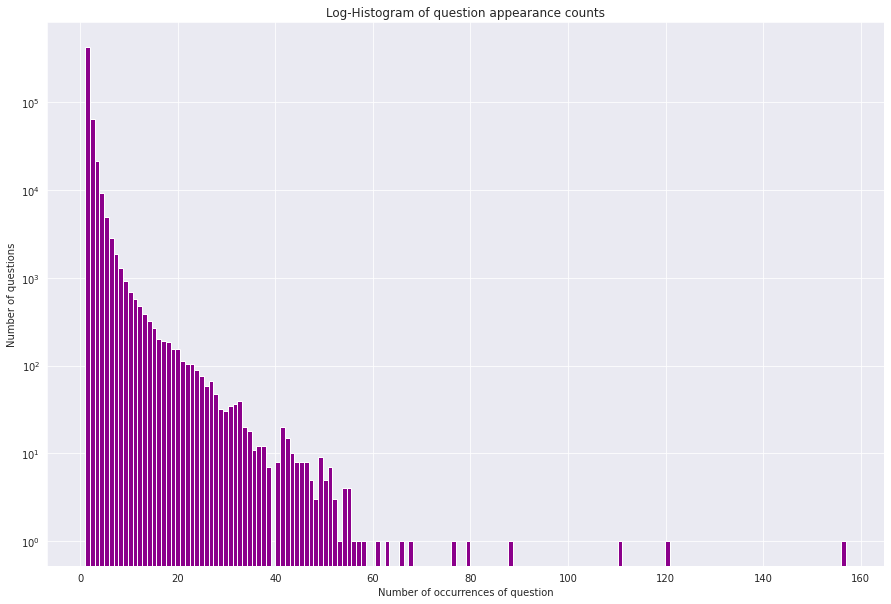

In [12]:
plt.figure(figsize=(15, 10))

# plt.hist(qids.value_counts(), bins=160)
sns.distplot(qids.value_counts(), kde = False, color='darkmagenta', bins=160, hist_kws=dict(alpha=1))

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurrences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

<h3> 3.2.5 Checking for NULL values </h3>

In [13]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id  ...  is_duplicate
105780  105780  ...             0
201841  201841  ...             0
363362  363362  ...             0

[3 rows x 6 columns]


- There are two rows with null values in question2 

In [14]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<h2>3.3 Basic Feature Extraction (before cleaning) </h2>

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [16]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


<h4> EDA using dataset description</h4>

In [17]:
df.describe()

,id,qid1,qid2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198,2.827609,3.046961,59.536709,60.108365,10.944592,11.185120,4.511610,21.126112,0.223362,5.874570,1.845715
std,116708.614503,157751.700002,159903.182629,0.482588,4.487418,6.026871,29.940655,33.863870,5.431949,6.311076,3.098656,8.592622,0.128336,9.091068,5.187882
min,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000,1.000000,1.000000,39.000000,39.000000,7.000000,7.000000,2.000000,15.000000,0.125000,2.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000,1.000000,1.000000,52.000000,51.000000,10.000000,10.000000,4.000000,19.000000,0.217391,3.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000,3.000000,2.000000,72.000000,72.000000,13.000000,13.000000,6.000000,25.000000,0.318182,5.000000,2.000000
max,404289.000000,537932.000000,537933.000000,1.000000,50.000000,120.000000,623.000000,1169.000000,125.000000,237.000000,41.000000,166.000000,0.500000,157.000000,119.000000


### Observation: 

1. The average length of questions 1 is 59. This differs very slightly from the average length of question 2 which is 60.
2. There are only 25% questions which is greater than 72 units of length. The maximum length of question 1 is 623 and question 2 is 1169.

<h3> 3.3.1 Analysis of some of the extracted features </h3>

- Here are some questions have only one single words.

In [ ]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 67
Number of Questions with minimum length [question2] : 24


<h4> 3.3.1.1 Feature: word_share </h4>

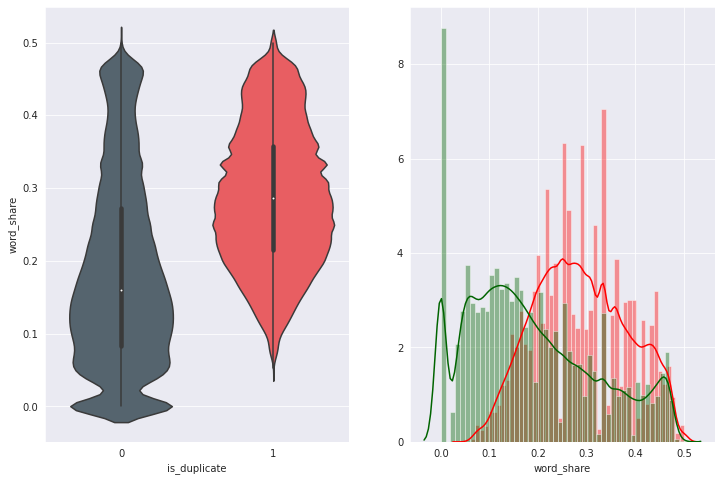

In [ ]:
plt.figure(figsize=(12, 8))

col_alt = ['slate', 'light red']
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:], palette = sns.xkcd_palette(col_alt))

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'darkgreen' )
plt.show()

- The distributions for normalized `word_share` have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

<h4> 3.3.1.2 Feature: word_Common </h4>

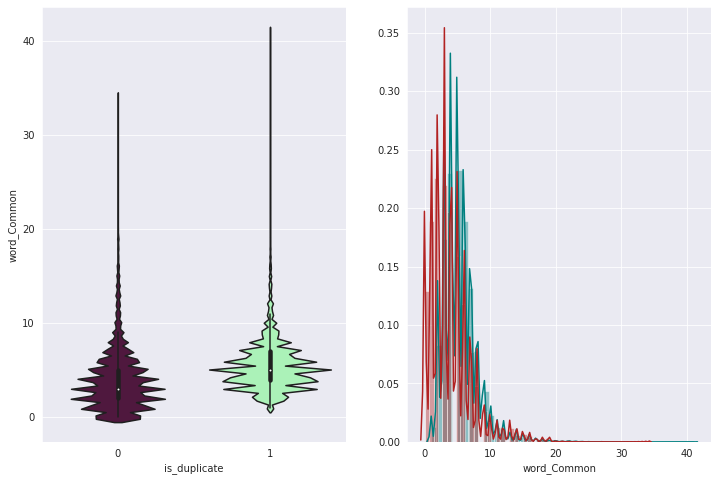

In [ ]:
plt.figure(figsize=(12, 8))
col_alt = ['plum', 'mint']
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:], palette = sns.xkcd_palette(col_alt))

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'teal')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'firebrick' )
plt.show()

The distributions of the `word_Common` feature in similar and non-similar questions are highly overlapping.

<h4> 3.3.1.3 Feature: word_Total</h4>

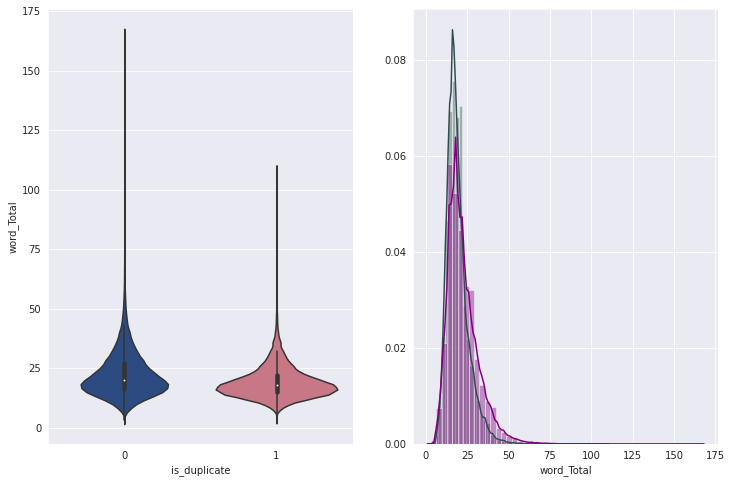

In [27]:
plt.figure(figsize=(12, 8))
col_alt = ['cobalt', 'pinkish']
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Total', data = df[0:], palette = sns.xkcd_palette(col_alt))

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Total'][0:] , label = "1", color = 'darkslategray')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Total'][0:] , label = "0" , color = 'purple' )
plt.show()

The distribution of `word_Total` features for duplicate as well as non duplicate pairs of questions are heavily overlapping

<h4> 3.3.1.4 Feature: q1len </h4>

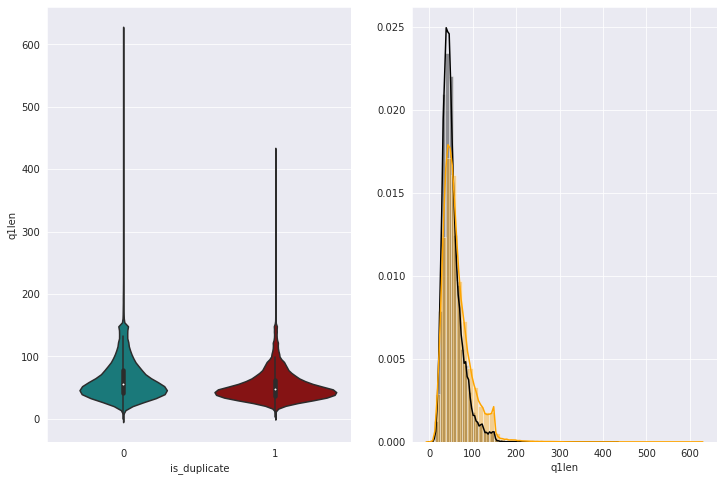

In [28]:
plt.figure(figsize=(12, 8))
col_alt = ['dark cyan', 'blood red']
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'q1len', data = df[0:], palette = sns.xkcd_palette(col_alt))

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['q1len'][0:] , label = "1", color = 'black')
sns.distplot(df[df['is_duplicate'] == 0.0]['q1len'][0:] , label = "0" , color = 'orange' )
plt.show()

The feature `q1len` is very overlapping for both the duplicate as well as non duplicate questions. Also, we can see that the length of question 1 varies from 0 to a maximum of almost 200. This means most of the users posts questions which are less than 200 units of length.

<h4> 3.3.1.5 Feature: q2len </h4>

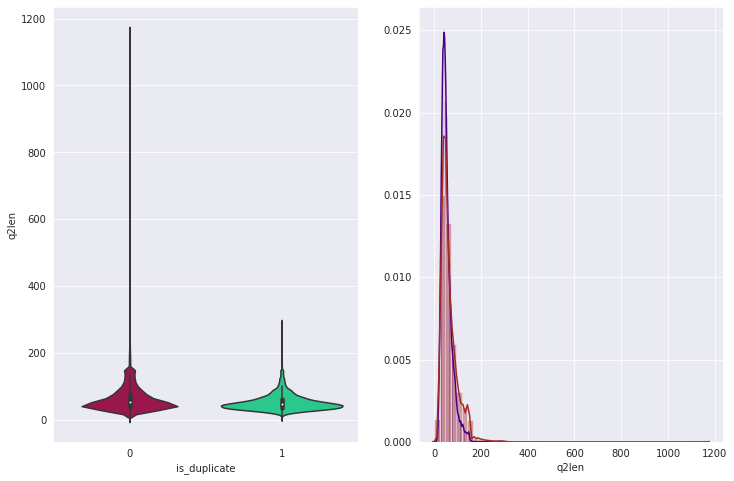

In [29]:
plt.figure(figsize=(12, 8))
col_alt = ['raspberry', 'aqua green']
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'q2len', data = df[0:], palette = sns.xkcd_palette(col_alt))

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['q2len'][0:] , label = "1", color = 'indigo')
sns.distplot(df[df['is_duplicate'] == 0.0]['q2len'][0:] , label = "0" , color = 'brown' )
plt.show()

The feature q2len is very overlapping for both the duplicate as well as non duplicate questions. Also, we can see that the length of question 2 varies from 0 to a maximum of almost 200. This means most of the users posts questions which are less than 200 units of length.

<h4> 3.3.1.6 Draw pair plots for basic features:  'q1_n_words', 'q2_n_words', 'freq_q1-q2', 'freq_q1+q2','freq_qid1','freq_qid2'</h4>

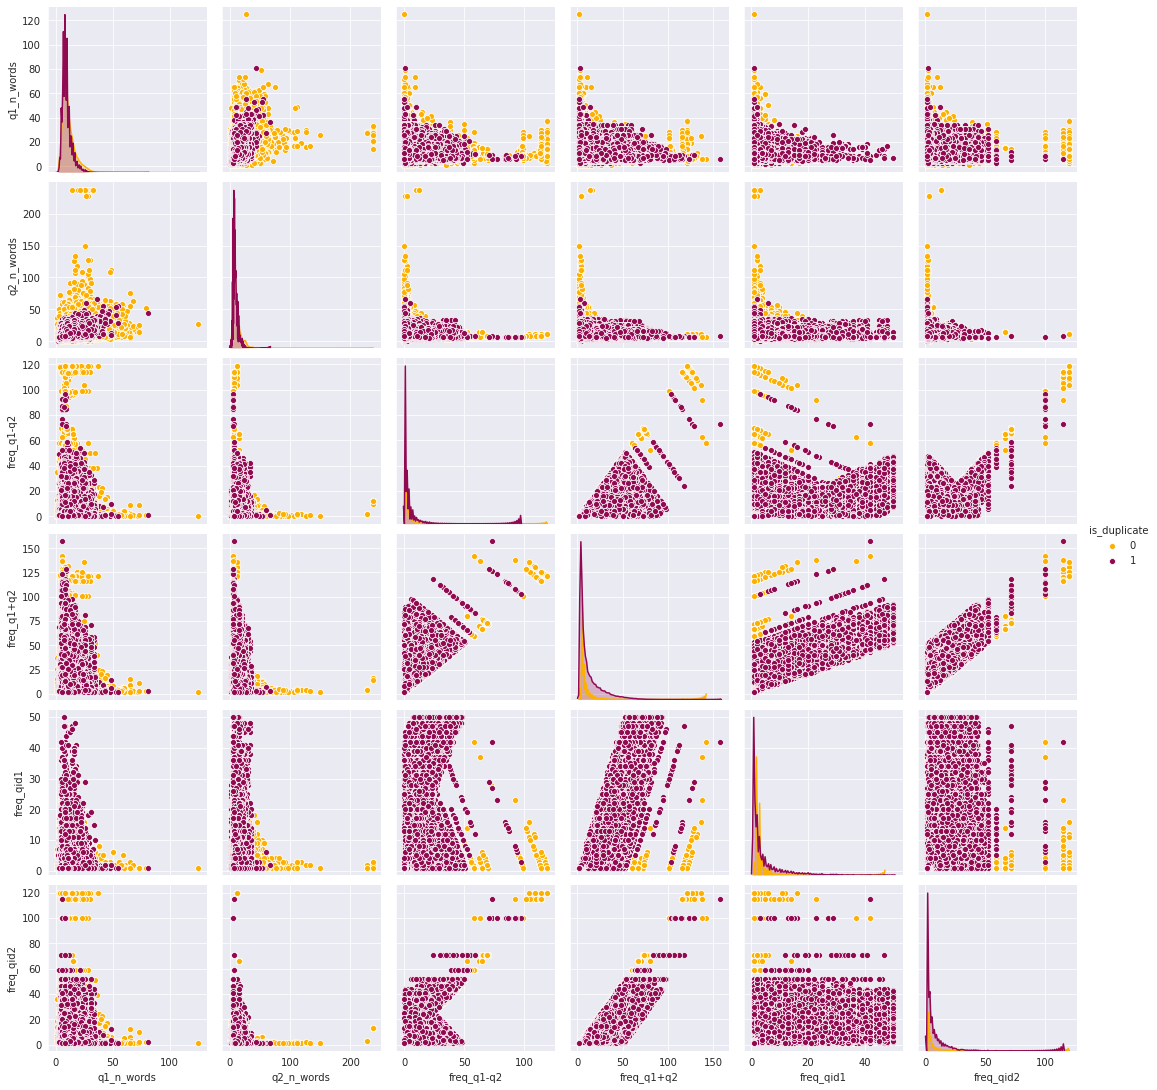

In [31]:
length = df.shape[0]
col_alt = ['yellow orange', 'reddish purple']
sns.pairplot(df[['q1_n_words', 'q2_n_words', 'freq_q1-q2', 
                 'freq_q1+q2','freq_qid1','freq_qid2','is_duplicate']][0:length], 
             hue='is_duplicate', palette = sns.xkcd_palette(col_alt), 
             vars=['q1_n_words', 'q2_n_words', 'freq_q1-q2', 'freq_q1+q2','freq_qid1','freq_qid2'])
                                                                                                       
                                                                                                       
plt.show()


- From the above pair plot, we can see that some of the features are very useful in seperating the two classes (0 and 1). We can write simple if-else rules to classify the datapoints.
- If we take a look at the distributions of each of these features, all of them are highly skewed towards the left. This suggests that the spread is very small